# Uwalaka Chiagozie HW6

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, recall_score, mean_squared_error, mean_absolute_error
from sklearn import tree
from sklearn.datasets import make_moons
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

1. Import the data set into pandas data frame and inspect it. This data set provides
information on the following variables.

In [2]:
data=pd.read_csv("cali_housing.csv")

cali_housing=pd.DataFrame(data)
cali_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09,0.781
20636,2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21,0.771
20637,1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22,0.923
20638,1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32,0.847


2. Select one or more explanatory variables you would like to use by looking at the scatter plot how each of those explanatory variables affects the target variable.


Text(0, 0.5, 'Medium Income')

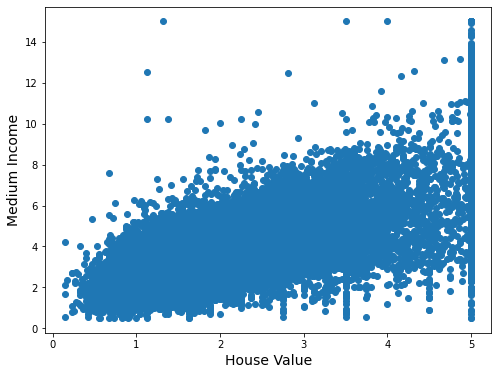

In [3]:
X=cali_housing[[ "MedHouseVal"]]
y=cali_housing["MedInc"]

plt.figure(figsize=(8, 6))

plt.scatter(cali_housing.MedHouseVal, cali_housing.MedInc)
plt.xlabel('House Value', fontsize=14)
plt.ylabel('Medium Income', fontsize=14)

3. Split the data into training and testing sets.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


4. Figure out if there are any missing values in the explanatory variables you want to use. If there are any missing values, you can either delete those data instances from the data set or fill in the missing values. If a numerical variable has missing values, you might fill those in with the average or median of that variable. If a categorical variable has missing values, you might fill those in using the most common value.

In [6]:
cali_housing.isnull().sum() #As you can see there are no missing values.

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

5. Build a regression tree using the training data.

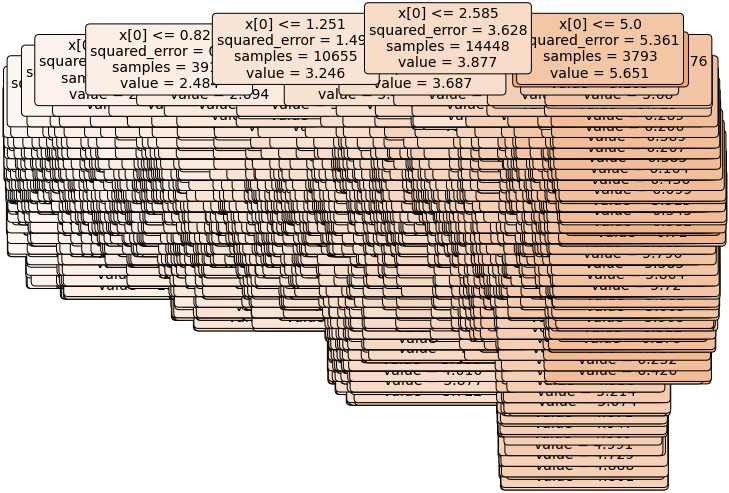

In [8]:
regressor = tree.DecisionTreeRegressor()
regressor.fit(X_train, y_train)
plt.figure(figsize=(10,8))

tree.plot_tree(regressor,
               filled=True, 
               rounded=True,
               fontsize=14);

6. Inspect the evaluation measures such as MAE, MSE, or RMSE

In [19]:
#Mean Squared Error
print("The mean squared error is: ",mean_squared_error(y_test, regressor.predict(X_test)))

#Root Mean Squared Errot:
print("The root mean squared error is: ",sqrt(mean_squared_error(y_test, regressor.predict(X_test))))

#Mean Absolute Error
print("The mean abosulute error is: ",mean_absolute_error(y_test, regressor.predict(X_test)))


The mean squared error is:  1.985546019841672
The root mean squared error is:  1.4090940422277258
The mean abosulute error is:  1.0317009124356158


7. Modify the tree hyper-parameters (such as criterion, max depth, min samples split,
and min samples leaf) of your model to increase the quality of the prediction. You
might plot graphs showing error for different values of these parameters.

In [21]:
?tree.DecisionTreeRegressor

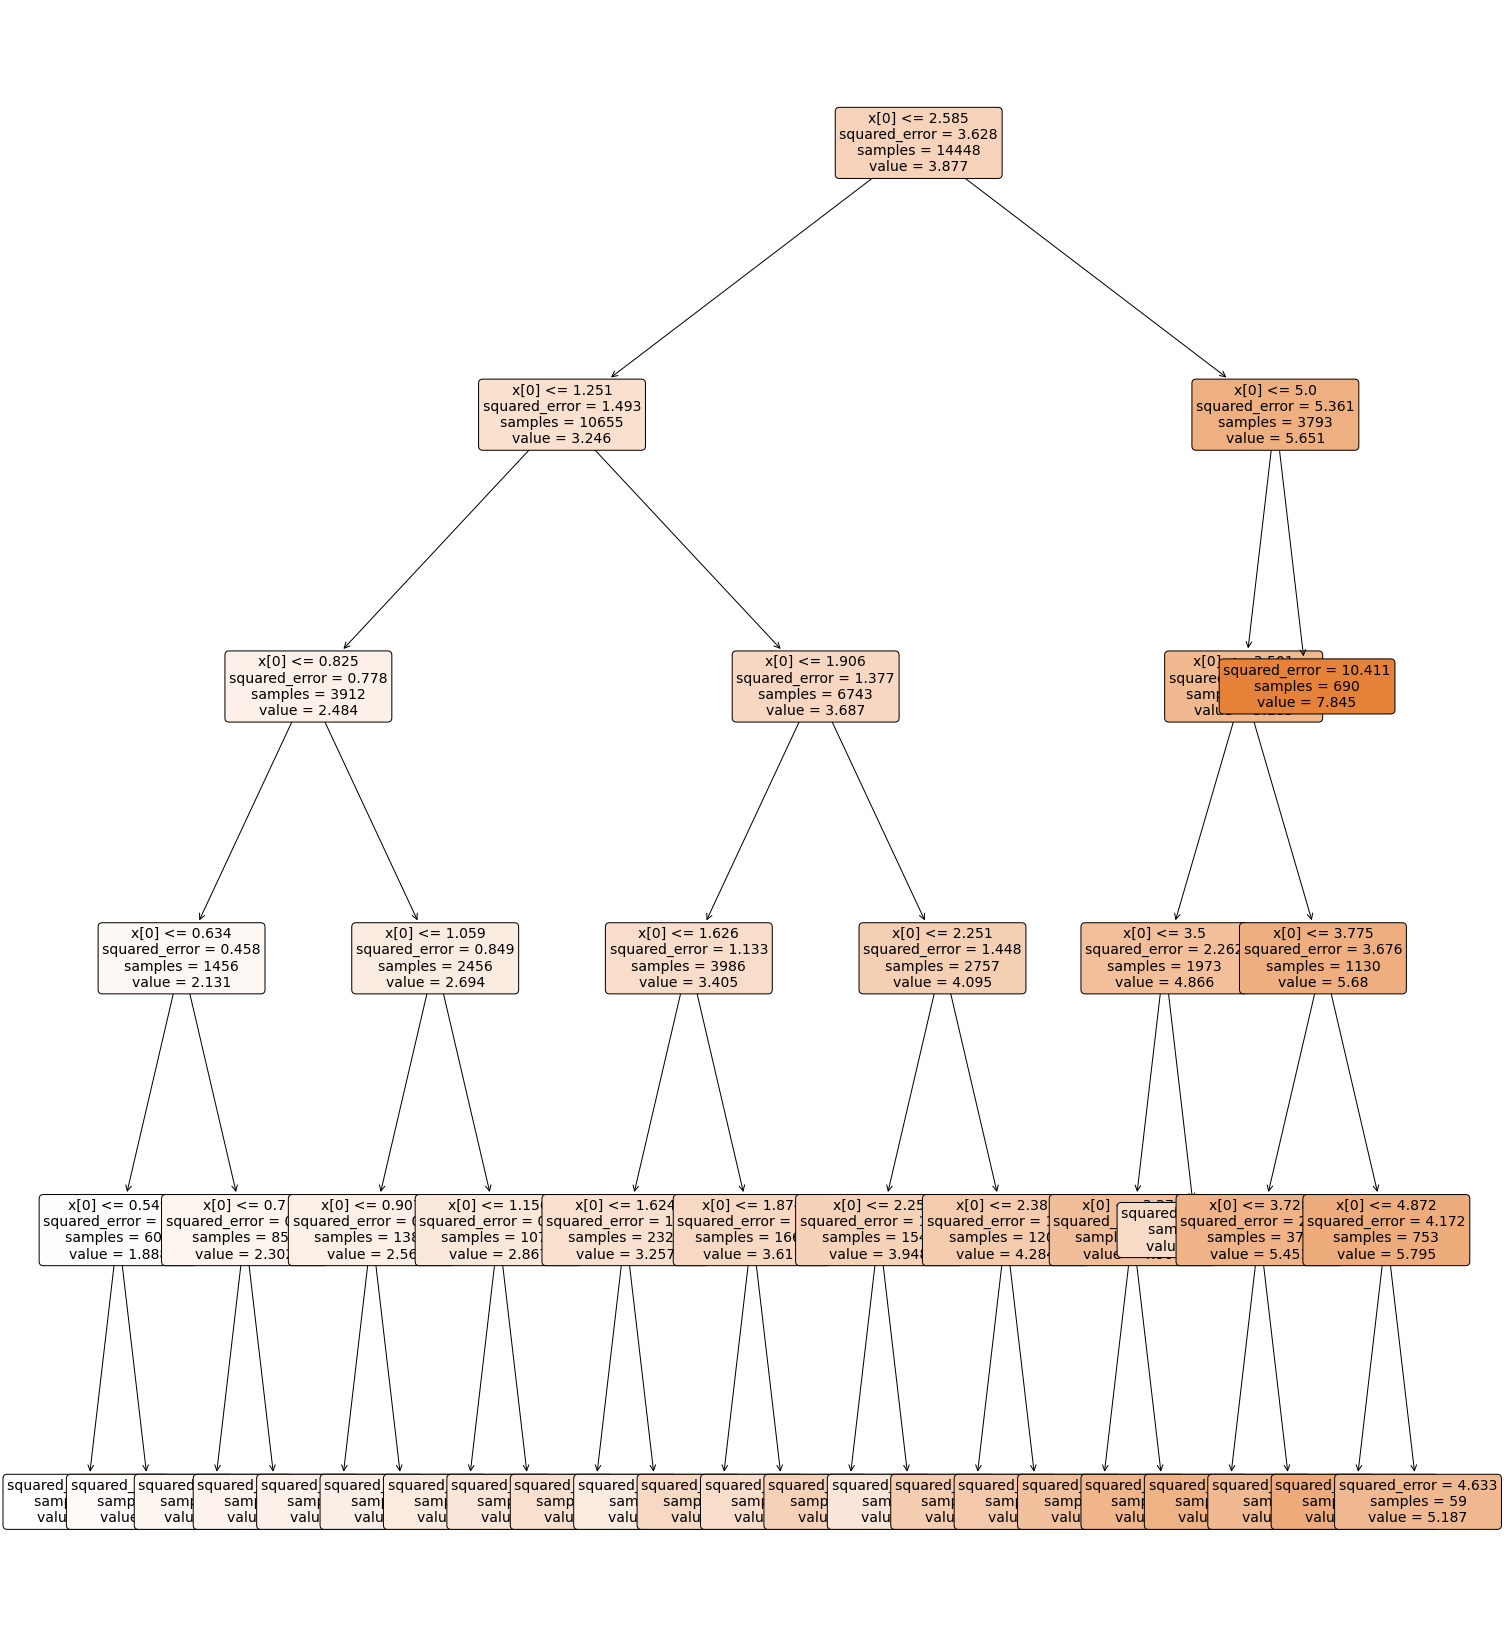

In [26]:
regressor = tree.DecisionTreeRegressor(max_depth=5,min_samples_split=15, min_samples_leaf=50)
regressor.fit(X_train, y_train)
plt.figure(figsize=(25,30))

tree.plot_tree(regressor,
               filled=True, 
               rounded=True,
               fontsize=14);

8. Use GridSearchCV(), RandomizedSearchCV(), or pruning to find the best model.

In [40]:
param_grid = {
    'max_depth': range(1, 21),
    'min_samples_split': range(2, 20),
    'criterion': ['squared_error', 'poisson']
}

# Create an instance of the DecisionTreeRegressor with the desired criterion
dt_regressor = DecisionTreeRegressor()

gs_model = GridSearchCV(
    estimator=dt_regressor,
    param_grid=param_grid,
    cv=10,
    scoring='neg_mean_squared_error',  # Use an appropriate regression scoring metric
    error_score='raise'
)

gs_model.fit(X_train, y_train)



GridSearchCV(cv=10, error_score='raise', estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'poisson'],
                         'max_depth': range(1, 21),
                         'min_samples_split': range(2, 20)},
             scoring='neg_mean_squared_error')

9. Compute the MAE, MSE, or RMSE for your model.

In [41]:
y_pred = gs_model.predict(X_test) 

# Compute MAE
mae = mean_absolute_error(y_test, y_pred)

# Compute MSE
mse = mean_squared_error(y_test, y_pred)

# Compute RMSE
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


MAE: 0.9885567878479422
MSE: 1.8129133877445163
RMSE: 1.3464447213846233


In [ ]:
10. Determine which features are the most important in your model.

In [44]:
feature_importances = gs_model.best_estimator_.feature_importances_

# Match feature importances to feature names
feature_names = X_train.MedHouseVal  # Replace with your actual feature names

# Create a list of (feature name, feature importance) pairs
feature_importance_pairs = list(zip(feature_names, feature_importances))

# Sort features by importance in descending order
feature_importance_pairs.sort()

# Print the most important features
for feature, importance in feature_importance_pairs:
    print(f"{feature}: {importance}")


1.938: 1.0


In [43]:
X_train

,MedHouseVal
7061,1.93800
14689,1.69700
17323,2.59800
10056,1.36100
15750,5.00001
...,...
11284,2.29200
11964,0.97800
5390,2.22100
860,2.83500


In [45]:
cali_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09,0.781
20636,2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21,0.771
20637,1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22,0.923
20638,1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32,0.847


In [55]:
new_data = {'MedHouseVal': cali_housing["MedHouseVal"].mean()}

new_data_df = pd.DataFrame([new_data])

# Use your trained model to make predictions
predicted_median_house_value = gs_model.predict(new_data_df)

# Print the predicted median house value
print("Predicted Median House Value:", predicted_median_house_value[0])


Predicted Median House Value: 3.915983094812166
